In [1]:
import seaborn as sns
import os
import sys
import numpy as np
import random

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiments.result_buckets import human_results
from experiments.bucket_analysis import BucketDatasetResult

%load_ext autoreload
%autoreload 2

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 29091.55it/s]


### Main Consistency Section (Section 5)

In [ ]:
## section 5 table 3

for dataset in ['snli', 'atomic', 'social', 'anli']:
    bucket_preds = human_results['roberta'][f'{dataset}-human']
    test_preds = human_results['roberta'][f'{dataset}-test']

    print(green(dataset))

    print('P(FLIP):', bucket_preds.calculate_p_flip(test_preds)['flip_prob'])
    print('P(FLIP)-corrected:', bucket_preds.calculate_p_flip(test_preds)['flip_prob_corrected'])
    print('P(FLIP) sanity check:', 2 * bucket_preds.law_of_total_variance_breakdown()['unexplained_variance'])
    print()
    print('P(STAY):', bucket_preds.calculate_p_stay(test_preds)['stay_prob'])
    print('P(STAY)-corrected:', bucket_preds.calculate_p_stay(test_preds)['stay_prob_corrected'])
    print('P(STAY) sanity check:', 1 - bucket_preds.calculate_p_flip(test_preds)['flip_prob'], 'P(STAY)-corrected sanity check:', 1-bucket_preds.calculate_p_flip(test_preds)['flip_prob_corrected'])
    print()
    print('C:', bucket_preds.mean_unweighted_consistency)
    print('C-corrected:', bucket_preds.calculate_weighted_consistency(test_preds))
    print()
    print('POVE:', bucket_preds.law_of_total_variance_breakdown()['POVE'])
    print('POVE-corrected:', bucket_preds.calculate_weighted_proportion_explained(test_preds))
    print("------------------------------------")

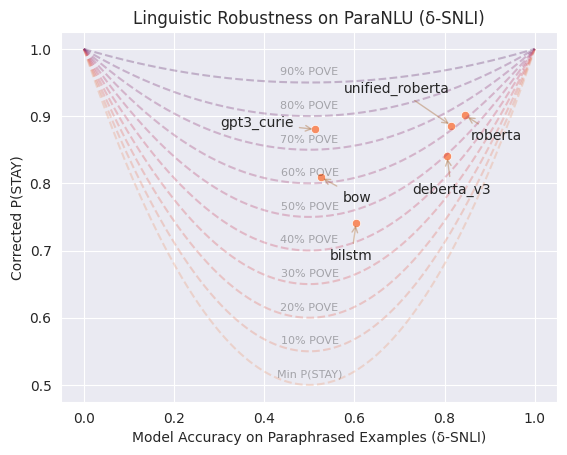

In [68]:
from simple_colors import *
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from plotting_utils import plot_isocurves

x = []
y = []
names = []
dataset = 'snli'

for model, results in human_results.items():
    analysis = results[f'{dataset}-human']
    test_results = results[f'{dataset}-test']

    linguistic_robustness = analysis.linguistic_robustness_summary(test_results)
    
    #print(green(model))
    #print(linguistic_robustness)

    # print('P(STAY):', linguistic_robustness['stay_prob'])
    # print('P(STAY)-corrected:', linguistic_robustness['stay_prob_corrected'])
    # print('\ntest set acc:', test_results.accuracy)
    # print('paranlu acc:', analysis.original_example_accuracy())
    # print('paraphrase acc:', analysis.paraphrase_accuracy())
    # print('paraphrase acc corrected:', analysis.calculate_weighted_paraphrase_accuracy(test_results))
    #print()
    
    x.append(analysis.calculate_weighted_paraphrase_accuracy(test_results))
    y.append(linguistic_robustness['stay_prob_corrected'])
    names.append(model)
    

sns.scatterplot(x=x, y=y, color='#f78d63')

ax = plt.gca()
ax.set_xlabel("Model Accuracy on Paraphrased Examples (δ-SNLI)")
ax.set_ylabel("Corrected P(STAY)")
ax.set_title(f'Linguistic Robustness on ParaNLU (δ-SNLI)')

for i in range(len(names)):
    
    arrow_properties = dict(arrowstyle='->', connectionstyle='arc3', color='#a86832', alpha=0.4)
    positionings = {
        'bow': [0.08, -0.03],
        'gpt3_curie': [-0.13, 0.01],
        'bilstm': [-0.01, -0.05],
        'unified_roberta': [-0.12, 0.055],
        'deberta_v3': [0.01, -0.05],
        'roberta': [0.07, -0.03]
    }

    plt.annotate(names[i], xy=(x[i], y[i]), xytext=(x[i] + positionings[names[i]][0], y[i] + positionings[names[i]][1]), arrowprops=arrow_properties, fontsize=10, ha='center', va='center')


plot_isocurves(ax)

plt.savefig('modeling_paradigms_pstay.pdf')
plt.show()
